# 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the load_dataset method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

  a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.



In [95]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset("mpg")
df.shape

(398, 9)

In [96]:
df = df.dropna()

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


 b) Use describe only on those columns that are relevant to get statistical information from.



In [97]:
df["mpg"].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [98]:
df["horsepower"].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [99]:
df["cylinders"].describe()

count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

In [100]:
df["weight"].describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

In [101]:
df["model_year"].describe()

count    392.000000
mean      75.979592
std        3.683737
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

  c) Make some plots on some of the columns that you find interesting.



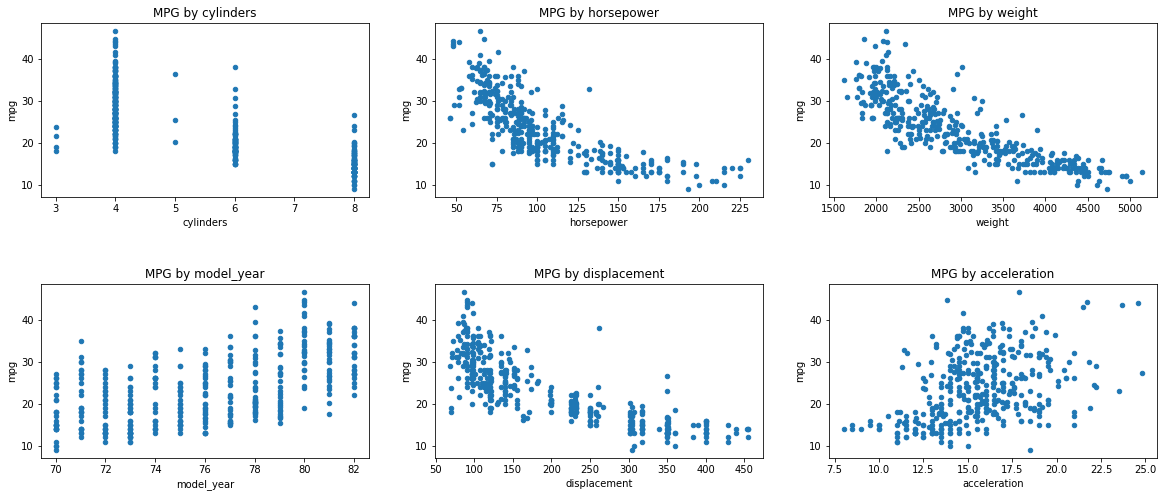

In [102]:
fig, axes = plt.subplots(2,3, figsize=(20, 8), facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=.5)

axes = axes.ravel()
x_axis = ["cylinders","horsepower","weight","model_year","displacement","acceleration"]

for i in range(6):
    df.plot(kind="scatter",x=x_axis[i],y="mpg",title=f"MPG by {x_axis[i]}",ax=axes[i])


  d) Check if there are any columns you might want to drop.

In [103]:
df = df.drop(columns=["origin","name"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


# 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.

In [104]:
from sklearn.model_selection import train_test_split

y_df = df["mpg"]
X_df = df.drop("mpg",axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 6), (118, 6), (274,), (118,))

# 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns LinearRegression() (OLS normal equation with SVD) and call your function to get metrics.

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_and_evaluate(model,X_train, X_test, y_train, y_test):
    #model fit
    model.fit(X_train,y_train)
    
    #predict 
    y_pred = model.predict(X_test)

    #evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae,mse,rmse
    

# 3. Compare models (*)

Create the following models :

- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

In [140]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures 
import pandas as pd 

#Models 
SVD = LinearRegression()
SGD= SGDRegressor()

#Plynomial data
polynomial_features_1 = PolynomialFeatures(degree=1,include_bias=False)
poly_X_train_1, poly_X_test_1 = polynomial_features_1.fit_transform(X_train), polynomial_features_1.fit_transform(X_test)
polynomial_features_2 = PolynomialFeatures(degree=2,include_bias=False)
poly_X_train_2, poly_X_test_2 = polynomial_features_2.fit_transform(X_train), polynomial_features_2.fit_transform(X_test)
polynomial_features_3 = PolynomialFeatures(degree=3,include_bias=False)
poly_X_train_3, poly_X_test_3 = polynomial_features_3.fit_transform(X_train) ,polynomial_features_3.fit_transform(X_test)

#scaling X train
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

<AxesSubplot:xlabel='Algo'>

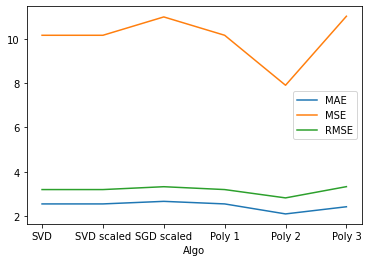

In [141]:
#df setup
models = [SVD, SVD, SGD, SVD, SVD, SVD]
X_train_list = [X_train,scaled_X_train,scaled_X_train,poly_X_train_1,poly_X_train_2,poly_X_train_3]
X_test_list = [X_test,scaled_X_test,scaled_X_test,poly_X_test_1,poly_X_test_2,poly_X_test_3]
algos = ["SVD","SVD scaled","SGD scaled","Poly 1","Poly 2","Poly 3"]


results = [[algos[i],train_and_evaluate(models[i],X_train_list[i],X_test_list[i],y_train,y_test)[0],train_and_evaluate(models[i],X_train_list[i],X_test_list[i],y_train,y_test)[1],train_and_evaluate(models[i],X_train_list[i],X_test_list[i],y_train,y_test)[2]] for i in range(6)]
results_df = pd.DataFrame(data=results,columns=["Algo","MAE","MSE","RMSE"])
results_df.plot(kind="line",x="Algo")